# Chains of circulations

<font size="4">which AG journal(s) initiate(s) chains of circulations within the AG community</font>

## Data Retrieval

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium
import VizKG.visualize as vkg
import plotly.express as px
import markdown as md

In [3]:
endpoint = "http://localhost:3030/VCHuman/sparql"

In [4]:
q ="""

PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX aat: <http://vocab.getty.edu/aat/>


SELECT DISTINCT ?cluster WHERE {

                ?cluster crm:P148_has_component ?image ;
                         crm:P1_is_identified_by ?identifier .
                ?image crm:P128i_is_carried_by ?issue . 
                ?issue crm:P2_has_type <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> .
      
                FILTER NOT EXISTS {
                         VALUES ?trash { <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000e8009061dc5b29fb17872c9c13ac1a64fe42e8b94af2481e59886f28d0156fde0ceb> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00026200b3d151e5c855c651b2a0bea2c9116be1a5e5b7141bacc846b12d3708338ff615> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000ca00a432dfdd48c6534088f51065c6f2983133e467314d5d6a4560ae5ea16de6f359> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000e8009061dc5b29fb17872c9c13ac1a64fe42e8b94af2481e59886f28d0156fde0ceb> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00008a005e931cc1f1dc0dc0f82d3ee457c5b642600420ae9313b50ad6c0d75b41b8f1c0> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0001bd00a370039869e9e1bb229cd73ddc231b51110e135de82d755ef72e3b367a5411e9> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000109002f020235176a28018a0944ed84b4b7ddbed8737474caaa5c0b54922a4cd6073c> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00024100820c145c252454de492f79784d2c1df4b3a13d9eabf0179f0e0305b516a764ba> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0003ec00036e6aa8355e0f69196bf6006defd506c93e04722b54cf7831c66c3c3b8dbb05> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200f89ef4fb7b639ce5e811ec9ec425c3da3b92dd5edb5d9e64fbf8d010f9d96d71> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000040066b73cf2a0b0742a0aceecc4dd1724b52dc7afbdc4b48432ee3f0336124798aa> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001200bed2a9ade1689744b661b58c1d93bcd442cbeafcf07b6460d0df1b33d65f5b86> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000022005d01a84e38421213b8816fd78e4aef0890445f65f81de2ee1459980a6335942a> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001600fe63944181de71b69fc3900867dc30611de913a214c5d42ac2e7ce3dd7cff99f> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000012009d66187e47b439dd2c2e6668dd9945209f40685c7039c56c563a4aa9bbfa9718> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00000d0069b0d3bd802ae948c1f53b96391afeb46fcd505e999cb56cd37406508e4ef418> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00000b002057ee6db2a8ea72c04e36379e7b035a4d2911a1155b5652230551866825ab90> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00000b0003d9d58d012451307b2ef5fbd75af31eec0c5f1afcdefb10b4ab8fbc38d15615> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00609f4e0b53f5b2ca7afaea13c7a3ba187b05ae3bdd1108598e5226a7aaf18ded> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000008005b033c554cfd743ed238cd05b35f46fe7de56720622971b00aecaf985896fe4a> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00000600d4e85eaf39fb676e999b8d2466a4455d48d70791ff2d4dd1cc4653c248264df3> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00002a00a60bf43cf1fb052165221ee1727e977b2ecf99f820cbbd426d12c6aa6a37d9e4> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000310098549f748176d2f4efedf76773dca2aafeaf8db5f746daf37a50dd3d0819dbb3> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0003d500d8362a66c04fe8273b00d9470929fd918a6dc6c4395f060e0c5e270f12f54f5c> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0003ff00a6da95a6b61b8c47220d9839b7b4b6afe26daad02ee0c0c291c40ad1bb0bec90> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000c9000f961bd877cdc346bd51b76a74b698924ae6960e3bbfa0986e7aea7da730930c> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0000d000ecf8a0329d2530d3eb601e077c0e5c298db100b8316c0af9232e41e8a7e8e4ef> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000403008f37a6852f6339eefe0e74225b20553b5d641b32015b15d40ca4d216a540ae2f> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00002400d7b4ea535865b256e1c13f0d6505182ead425183c8f919bfa3309aab1dae43dc> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001f00c18ad27c34a66610ece997934ce4bc1aa5fbcdad562e58a52ab86792352bfb9c> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00002b000918272590bc01401e6367c6448a222445fe13cabec0a2a38a7b38e598cea622> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000057008d59ea30b6175a9c5c32ebf3caa2c27cce0d569fd3b2a899ebf0107086c3a197> <https://visualcontagions.unige.ch/explore/duplicates/clusters/000028007bf1c23529418f9fba6de2955caa8fa4e1572632151c41a9f1b20c1c5a45a1c5> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00005a009d47a1932fcbbe7ff04ac3017fa6d167f06fe3287477d6c1cedae50451cd67dc> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001f0087307813ef1d16a6def5d96b8b6550a707da4fd6702aa64d8425b29e6826f049> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001c0000968f38146238bab2f376c40b0fca62e734f151a85e2ecce4981e0050eb57a0> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001d00ffc088f4f254a86d70e0a3495bbf5f288b1373e96c6875d487cd1b14076e2702> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001d000d01d183fa765191f6028c4b69a7e1c9c9ed1d9a3ae14bb9a4731b5172f4b337> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00001c002016002f400721bfa0a32f16e887e64cc4e092cd626a7fb7c426545e0757e7f1> <https://visualcontagions.unige.ch/explore/duplicates/clusters/0002910088db3f58b1c573c281f266c695c21d421c9337abca57d4a51440e13a2f9c5893> <https://visualcontagions.unige.ch/explore/duplicates/clusters/00028200ce1d42e579bb46d53b1b038b5f23bf88a8057f5d5cb9806d9c87dee28477ecc4>
                                       }.
                                        
                          ?cluster crm:P1_is_identified_by  ?trash . }
                
    } 

"""

In [5]:
df = sparql_dataframe.get(endpoint, q)

In [6]:
df

,cluster
0,https://lod.unige.ch/vc/cluster/human/353
1,https://lod.unige.ch/vc/cluster/human/352
2,https://lod.unige.ch/vc/cluster/human/376
3,https://lod.unige.ch/vc/cluster/human/210
4,https://lod.unige.ch/vc/cluster/human/331
...,...
77,https://lod.unige.ch/vc/cluster/human/366
78,https://lod.unige.ch/vc/cluster/human/402
79,https://lod.unige.ch/vc/cluster/human/57
80,https://lod.unige.ch/vc/cluster/human/335


In [7]:
df['cluster'] = '<' + df['cluster'].astype(str)
df['cluster'] = df['cluster'].astype(str) +  '>' 
cluster = df["cluster"].values.tolist()

In [8]:
n_cluster = len(cluster)
print("We retrieved {} clusters with at least one image from an AG journal".format(n_cluster))

We retrieved 82 clusters with at least one image from an AG journal


<font size="4">The list should be used for another SPARQL query, so a separator between the uri should be added </font>

In [9]:
separator = ' '
values = separator.join(cluster)

<font size="4">We use the results obtained in the first query for a second query</font>

In [10]:
q1= """
    PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
    PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
    PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX aat: <http://vocab.getty.edu/aat/>
    
    SELECT DISTINCT ?cluster ?identifier ?image ?issueLabel ?countryLabel ?labelType ?cityLabel ?begin {
    VALUES ?cluster { %s } .
    
    ?cluster crm:P148_has_component ?image ;
           	crm:P1_is_identified_by ?identifier .
            
            ?image crm:P128i_is_carried_by ?issue . 
		
        ?issue crm:P108i_was_produced_by ?production ;
                rdfs:label ?issueLabel ;
                crm:P2_has_type ?typeIssue .
        ?typeIssue rdfs:label ?labelType .
        
        ?production crm:P4_has_time-span ?time ;
                     crm:P7_took_place_at ?country .
                     
        ?time a crm:E52_Time-Span;
                crm:P81a_end_of_the_begin ?begin . 
        
        ?country crm:P2_has_type aat:300387506 ;
                rdfs:label ?countryLabel .
        
        OPTIONAL {
        
        ?production crm:P7_took_place_at ?city .
        ?city crm:P2_has_type aat:300008389 ;
                rdfs:label ?cityLabel .
        }
          
            
    }    
    
""" % values

In [11]:
df1 = sparql_dataframe.get(endpoint, q1)

In [12]:
df1

,cluster,identifier,image,issueLabel,countryLabel,labelType,cityLabel,begin
0,https://lod.unige.ch/vc/cluster/human/353,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1929-01-01T00:00:00
1,https://lod.unige.ch/vc/cluster/human/353,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8024103;...,Vell i Nou,Spain,Art Journal,Barcelona,1919-11-01T00:00:00
2,https://lod.unige.ch/vc/cluster/human/353,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k32...,Les Soirées de Paris,France,Avant-garde Journal,Paris,1914-01-01T00:00:00
3,https://lod.unige.ch/vc/cluster/human/353,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,Les Soirées de Paris,France,Avant-garde Journal,Paris,1914-05-15T00:00:00
4,https://lod.unige.ch/vc/cluster/human/352,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1929-01-01T00:00:00
...,...,...,...,...,...,...,...,...
968,https://lod.unige.ch/vc/cluster/human/228,https://visualcontagions.unige.ch/explore/anal...,https://digi.ub.uni-heidelberg.de/iiif/2/kunst...,Der Kunstwart,Germany,Art Journal,Munich,1928-01-01T00:00:00
969,https://lod.unige.ch/vc/cluster/human/228,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k61...,La Renaissance,France,Art Journal,Paris,1931-03-01T00:00:00
970,https://lod.unige.ch/vc/cluster/human/228,https://visualcontagions.unige.ch/explore/anal...,https://digi.ub.uni-heidelberg.de/iiif/2/cicer...,Der Cicerone,Germany,Modern Art Journal,Leipzig,1930-01-01T00:00:00
971,https://lod.unige.ch/vc/cluster/human/228,https://visualcontagions.unige.ch/explore/anal...,https://digi.ub.uni-heidelberg.de/iiif/2/form1...,Die Form,Germany,Avant-garde Journal,Berlin,1928-01-01T00:00:00


<font size="4">Let's reshape the dataset. Each image need to have a row and need to be grouped together with their original cluster information. </font>

In [13]:
melted = df1.melt(id_vars=["cluster", "identifier", "begin", "issueLabel", "labelType", "cityLabel","countryLabel"], value_name ="url")
melted.sort_values(by=['identifier', 'begin'], inplace=True)

In [14]:
melted

,cluster,identifier,begin,issueLabel,labelType,cityLabel,countryLabel,variable,url
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1923-01-04T00:00:00,Der Sturm,Avant-garde Journal,Berlin,Germany,image,https://bluemountain.princeton.edu/bluemtn/iii...
632,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1932-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
631,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
633,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
636,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
...,...,...,...,...,...,...,...,...,...
90,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1968-06-01T00:00:00,Macedonio. Literatura – Teatro – Cine – Artes,Cinema,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8048994;...
52,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1978-06-01T00:00:00,El Ornitorrinco. Revista de literatura,Literature,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...
76,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1978-06-01T00:00:00,El Ornitorrinco. Revista de literatura,Literature,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...
78,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1978-06-01T00:00:00,El Ornitorrinco. Revista de literatura,Literature,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...


In [15]:
melted.to_csv('csv/melted.csv', index=False)

### Escape the loop

<font size="4">In order to avoid computing circulation within the same journal, we eliminate from our analysis the clusters which do comprise only a single journal (internal journal circulation).</font>

In [16]:
melted_new = melted.groupby('identifier').issueLabel.nunique() > 1
b = melted_new.index[melted_new == True]
melted_only_unique = melted[melted['identifier'].isin(b)]

In [17]:
melted_only_unique

,cluster,identifier,begin,issueLabel,labelType,cityLabel,countryLabel,variable,url
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1923-01-04T00:00:00,Der Sturm,Avant-garde Journal,Berlin,Germany,image,https://bluemountain.princeton.edu/bluemtn/iii...
632,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1932-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
631,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
633,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
636,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...
...,...,...,...,...,...,...,...,...,...
90,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1968-06-01T00:00:00,Macedonio. Literatura – Teatro – Cine – Artes,Cinema,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8048994;...
52,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1978-06-01T00:00:00,El Ornitorrinco. Revista de literatura,Literature,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...
76,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1978-06-01T00:00:00,El Ornitorrinco. Revista de literatura,Literature,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...
78,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,1978-06-01T00:00:00,El Ornitorrinco. Revista de literatura,Literature,Buenos Aires,Argentina,image,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...


In [18]:
melted_only_unique.to_csv('csv/melted_only_unique.csv', index=False)

## Analysis of Internal Circulation of AG journals

### Only cluster with AG journals

<font size="4">Let's focus on AG journals only. In here we check the chains of circulations which exist only within the AG community.</font>

<br>

<font size="4">To do so, we find the clusters associated with a unique community, therefore the clusters which have only a single Journal Type associated with them</font>

In [19]:
uniType = melted_only_unique.groupby('identifier').labelType.nunique().eq(1)
c = uniType.index[uniType == True]
melted_type = melted_only_unique[melted_only_unique['identifier'].isin(c)]

In [20]:
melted_type_ag = melted_type.query("labelType == 'Avant-garde Journal'")

In [21]:
melted_type.to_csv('csv/melted_type.csv', index=False)

<font size="4">Let's filter for only AG journals</font>

In [22]:
melted_type_count = melted_type_ag
melted_type_count['count_images'] = melted_type_count.groupby(['identifier'])['cluster'].transform('count')

<font size="4">We now have the list of images from cluster containing only AG journals</font>

### Selecting the earliest images

<font size="4">Let's select only the earlier published image</font>

In [23]:
internal_ag = melted_type_count.groupby('identifier', group_keys=False).apply(lambda g: g[g['begin'].eq(g['begin'].min())].sample(n=1))

In [24]:
internal_ag

,cluster,identifier,begin,issueLabel,labelType,cityLabel,countryLabel,variable,url,count_images
740,https://lod.unige.ch/vc/cluster/human/295,https://visualcontagions.unige.ch/explore/anal...,1912-01-11T00:00:00,Umělecký mĕsíčník,Avant-garde Journal,Prague,Czech Republic,image,https://bluemountain.princeton.edu/bluemtn/iii...,8
724,https://lod.unige.ch/vc/cluster/human/350,https://visualcontagions.unige.ch/explore/anal...,1945-01-01T00:00:00,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,2
647,https://lod.unige.ch/vc/cluster/human/374,https://visualcontagions.unige.ch/explore/anal...,1913-01-01T00:00:00,Umělecký mĕsíčník,Avant-garde Journal,Prague,Czech Republic,image,https://bluemountain.princeton.edu/bluemtn/iii...,3
788,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,1921-01-01T00:00:00,Der Ararat,Avant-garde Journal,Munich,Germany,image,https://iiif.unige.ch/iiif/2/fedora_ug8092784;...,3


In [25]:
internal_ag['journal_count'] = internal_ag.groupby(['issueLabel'])['identifier'].transform('count')
internal_ag.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [26]:
internal_ag

,cluster,identifier,begin,issueLabel,labelType,cityLabel,countryLabel,variable,url,count_images,journal_count
740,https://lod.unige.ch/vc/cluster/human/295,https://visualcontagions.unige.ch/explore/anal...,1912-01-11T00:00:00,Umělecký mĕsíčník,Avant-garde Journal,Prague,Czech Republic,image,https://bluemountain.princeton.edu/bluemtn/iii...,8,2
647,https://lod.unige.ch/vc/cluster/human/374,https://visualcontagions.unige.ch/explore/anal...,1913-01-01T00:00:00,Umělecký mĕsíčník,Avant-garde Journal,Prague,Czech Republic,image,https://bluemountain.princeton.edu/bluemtn/iii...,3,2
724,https://lod.unige.ch/vc/cluster/human/350,https://visualcontagions.unige.ch/explore/anal...,1945-01-01T00:00:00,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,image,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,2,1
788,https://lod.unige.ch/vc/cluster/human/385,https://visualcontagions.unige.ch/explore/anal...,1921-01-01T00:00:00,Der Ararat,Avant-garde Journal,Munich,Germany,image,https://iiif.unige.ch/iiif/2/fedora_ug8092784;...,3,1


In [27]:
internal_ag = internal_ag.drop_duplicates(subset='url', keep="first")
internal_ag.to_csv('csv/internal_ag.csv', index=False)

In [28]:
internal_ag.rename({ 'countryLabel': 'Country'}, axis=1, inplace=True)

In [29]:
first_internal_ag = internal_ag[internal_ag['journal_count'] >= 5]

### Impact

<font size="4">how many chains of circulation a journal starts</font>

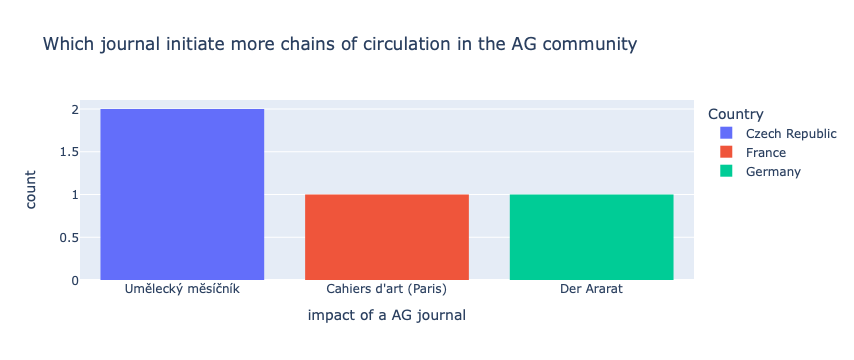

In [31]:
fig = px.histogram(internal_ag,  x='issueLabel', color="Country",
            title="Which journal initiate more chains of circulation in the AG community",
                  labels={
                     "issueLabel": "impact of a AG journal"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/human_internal_only.png",  scale=3, width=2000) 
fig.write_html('viz/human_internal_only.html', auto_open=True)

### Time Dynamics

<font size="4">Let's filter for only AG joournals. The data should be analysed in temporal slices, in order to understand the dynamicity of the circulation. We will look particular at this periods:</font>

- 1890-1905
- 1905-1914
- 1914-1918
- 1918-1930
- 1930-1940

</font>

In [ ]:
internal_ag['year'] = pd.DatetimeIndex(internal_ag['begin']).year

In [ ]:
internal1905 = (internal_ag['year'] > 1890) & (internal_ag['year'] <= 1905)
internal1914 = (internal_ag['year'] > 1905) & (internal_ag['year'] <= 1914)
internal1918 = (internal_ag['year'] > 1914) & (internal_ag['year'] <= 1918)
internal1930 = (internal_ag['year'] > 1918) & (internal_ag['year'] <= 1930)
internal1940 = (internal_ag['year'] > 1930) & (internal_ag['year'] <= 1940)
internal193540 = (internal_ag['year'] > 1935) & (internal_ag['year'] <= 1940)
internal193035 = (internal_ag['year'] > 1930) & (internal_ag['year'] <= 1935)
internal1920 = (internal_ag['year'] == 1920)


In [ ]:
i_ag1905 = internal_ag.loc[internal1905]
i_ag1914 = internal_ag.loc[internal1914]
i_ag1918 = internal_ag.loc[internal1918]
i_ag1930 = internal_ag.loc[internal1930]
i_ag1940 = internal_ag.loc[internal1940]
i_ag193035 = internal_ag.loc[internal193035]
i_ag193540 = internal_ag.loc[internal193540]
i_ag1920 = internal_ag.loc[internal1920]

In [ ]:
i_ag1920_urls = i_ag1920['url'].tolist()
gallery(i_ag1920_urls, row_height='200px')

#### 1905 - 1914

In [ ]:
i_ag1914['journal_count'] = i_ag1914.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1914.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [ ]:
fig = px.histogram(i_ag1914, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1905 - 1914", 
            labels={
                     "Number of Images": "Number of primitive images",
                     "issueLabel": "Journal name"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("viz/internal_1905_1914.png") 
#fig.write_html('1905.html', auto_open=True)

#### 1914 - 1918

In [ ]:
i_ag1918['journal_count'] = i_ag1918.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1918.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [ ]:
fig = px.histogram(i_ag1918, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1914 - 1918", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_image("viz/internal_1914_1918.png") 
#fig.write_html('1905.html', auto_open=True)

#### 1918 - 1930

In [ ]:
i_ag1930['journal_count'] = i_ag1930.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1930.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [ ]:
i_ag1930_top = i_ag1930[i_ag1930['journal_count'] >= 5]

In [ ]:
fig = px.histogram(i_ag1930_top, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1918 - 1930", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("viz/internal_1918_1930.png") 
fig.show()
fig.write_html('1930.html', auto_open=True)

#### 1930 - 1940

In [ ]:
i_ag1940['journal_count'] = i_ag1940.groupby(['issueLabel'])['identifier'].transform('count')
i_ag1940.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [ ]:
fig = px.histogram(i_ag1940, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1930 - 1940", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("viz/internal_1930_1940.png") 
fig.show()
#fig.write_html('1905.html', auto_open=True)

#### 1930 - 1935

In [ ]:
i_ag193035['journal_count'] = i_ag193035.groupby(['issueLabel'])['identifier'].transform('count')
i_ag193035.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [ ]:
fig = px.histogram(i_ag193035, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1930 - 1940", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("viz/internal_1930_1935.png") 
fig.show()
#fig.write_html('1905.html', auto_open=True)

#### 1935 - 1940

In [ ]:
i_ag193540['journal_count'] = i_ag193540.groupby(['issueLabel'])['identifier'].transform('count')
i_ag193540.sort_values(by=['journal_count'], ascending=False, inplace=True)

In [ ]:
fig = px.histogram(i_ag193540, x='issueLabel', color="Country",
            title="Chains of circulation from AG journals with other AG revues : 1930 - 1940", 
            labels={
                     "journal_count": "Number of primitive images",
                     "issueLabel": "Journal name"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("viz/internal_1935_1940.png") 
fig.show()
#fig.write_html('1905.html', auto_open=True)

## Primitive images

In [ ]:
image_vis = internal_ag.drop_duplicates(subset='url', keep="first")

In [ ]:
image_vis['year'] = pd.DatetimeIndex(image_vis['begin']).year

In [ ]:
image_vis['image_per_year'] = image_vis.groupby(['year'])['url'].transform('count')
image_vis.sort_values(by=['year'], ascending=True, inplace=True)

In [ ]:
fig = px.histogram(image_vis, x='year',
            title="Primitive images distribution per year",
                  labels={
                     "year": "Year of publication"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
#fig.write_html('viz/image_per_year.html', auto_open=True)
fig.write_image("viz/image_per_year.png") 

In [ ]:
fig = px.histogram(image_vis, x='year', color="Country",
            title="Primitive images distribution per year",
                  labels={
                     "image_per_year": "Images per year",
                     "year": "Year of publication"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
fig.write_html('viz/image_per_year_country.html', auto_open=True)
fig.write_image("viz/image_per_year_country.png")

## Analysing the chain

In [ ]:
internal_ag

## to cut: Sankey

In [ ]:
dfs = pd.read_csv("/Users/carboni/Downloads/test_sankey.csv")

In [ ]:
dfs.head()

In [ ]:
dfs['count'] = dfs.groupby(['url'])['issueLabel'].transform('count')

In [ ]:
dfs

In [ ]:
source = [0, 0, 1, 1, 2]
target = [2, 3, 4, 5, 4]
value = [8, 2, 2, 8, 4]
label = ["L'Esprit nouveau", "La Révolution surréaliste", "TWO", "THREE", "FOUR", "FIVE"]

In [ ]:
link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=50, thickness=5)
data = go.Sankey(link = link, node=node)
print(data)


In [ ]:
fig = go.Figure(data)
fig.show()